In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Import relevant classification model packages 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
import xgboost

     ---------------------------------------- 99.8/99.8 MB 1.7 MB/s eta 0:00:00


## Step 1: EDA
Dataset from Kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Will do the following:
(1) Understand data columns
(2) Data Cleaning: missing values, outliers, data types
(3) Look for Class Imbalance: Visualizing the distribution of the Attrition. Will implement oversampling or undersampling to address
(4) 



In [2]:
df = pd.read_csv('IBM HR Employee Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
def missing_perc(df):
    """
    Function to calculate missing data % by column
    given a data frame
    """
    missing_df = pd.DataFrame()
    missing_df['Col Name'] = list(df.columns)
    missing_df['Missing %'] = [round(i/df.shape[0] * 100,2) for i in df.isnull().sum()]
    missing_df.sort_values(by=['Missing %'], ascending=False,inplace=True)
    missing_df['Missing %'] = missing_df['Missing %'].astype('str') + '%'
    pd.set_option('display.max_rows', None)
    return missing_df

In [8]:
# Calculate missing data % per column
missing_perc(df)

,Col Name,Missing %
0,Age,0.0%
26,StandardHours,0.0%
20,NumCompaniesWorked,0.0%
21,Over18,0.0%
22,OverTime,0.0%
23,PercentSalaryHike,0.0%
24,PerformanceRating,0.0%
25,RelationshipSatisfaction,0.0%
27,StockOptionLevel,0.0%
18,MonthlyIncome,0.0%


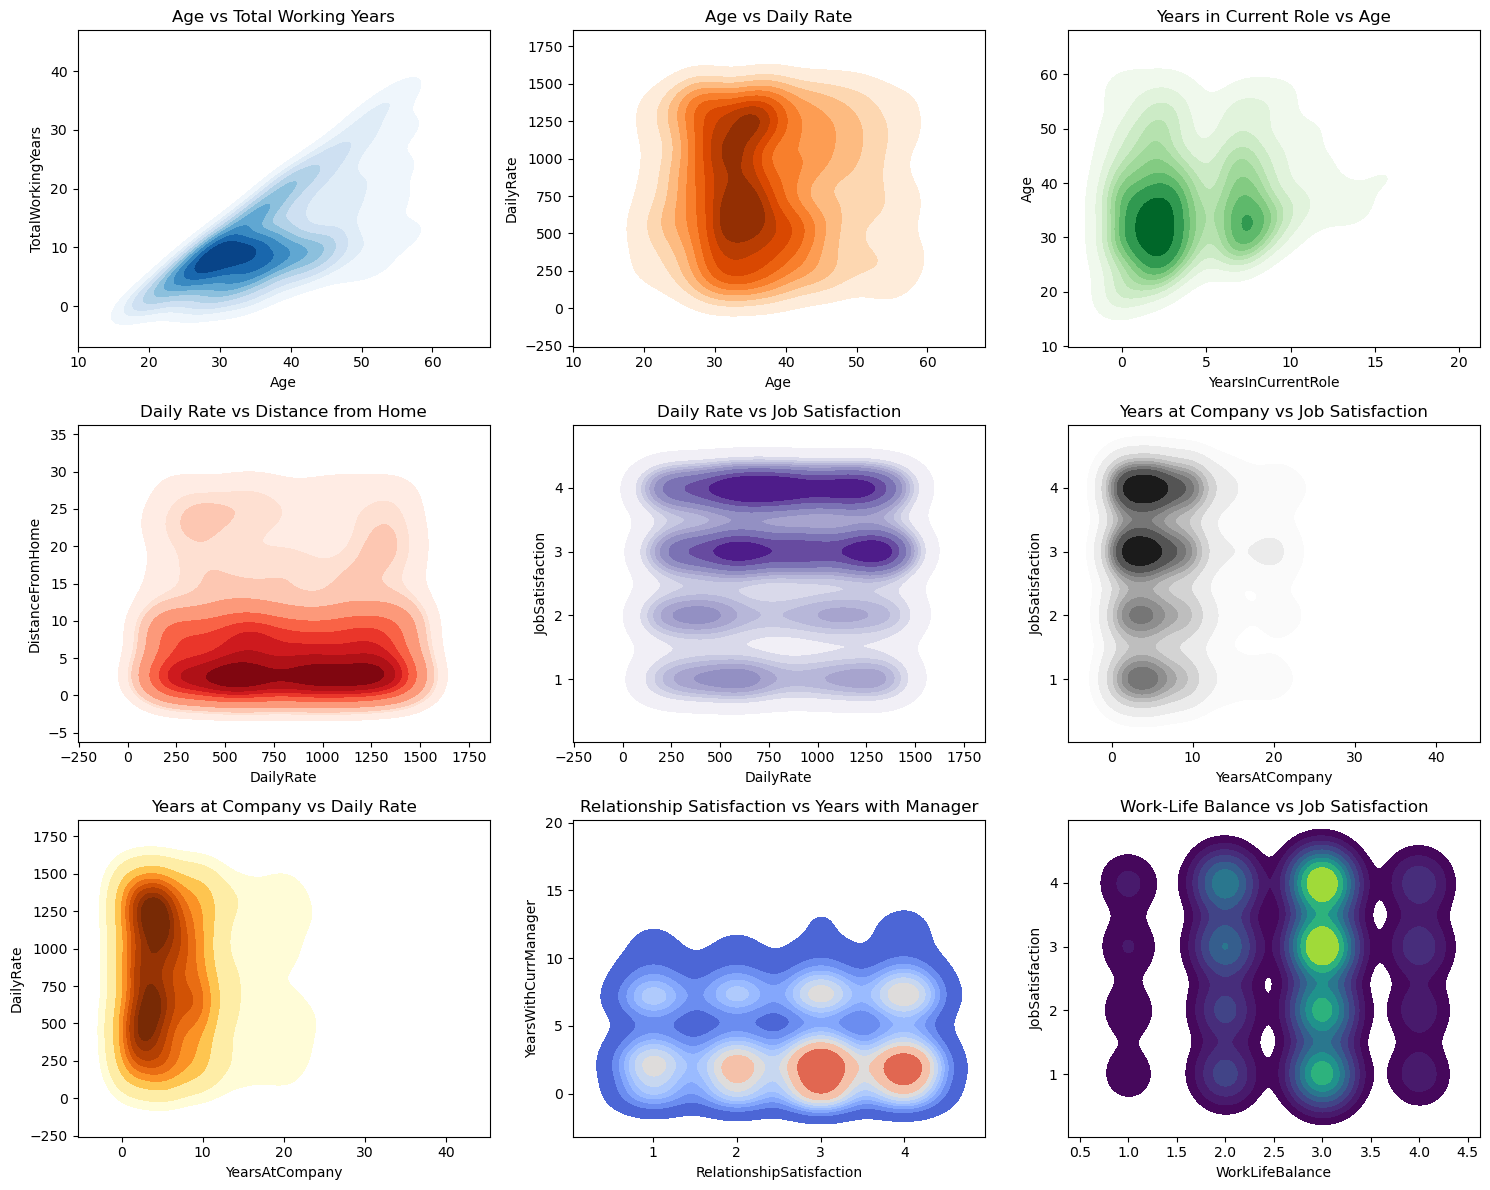

In [19]:
# Predefined colormaps for each plot
colormaps = [
    'Blues', 'Oranges', 'Greens', 'Reds', 'Purples',
    'Greys', 'YlOrBr', 'coolwarm', 'viridis'
]

# Define plot titles and corresponding dataframe columns
plot_config = [
    ('Age', 'TotalWorkingYears', 'Age vs Total Working Years'),
    ('Age', 'DailyRate', 'Age vs Daily Rate'),
    ('YearsInCurrentRole', 'Age', 'Years in Current Role vs Age'),
    ('DailyRate', 'DistanceFromHome', 'Daily Rate vs Distance from Home'),
    ('DailyRate', 'JobSatisfaction', 'Daily Rate vs Job Satisfaction'),
    ('YearsAtCompany', 'JobSatisfaction', 'Years at Company vs Job Satisfaction'),
    ('YearsAtCompany', 'DailyRate', 'Years at Company vs Daily Rate'),
    ('RelationshipSatisfaction', 'YearsWithCurrManager', 'Relationship Satisfaction vs Years with Manager'),
    ('WorkLifeBalance', 'JobSatisfaction', 'Work-Life Balance vs Job Satisfaction')
]

# Create a 3x3 subplot structure
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the plot configuration to create each subplot
for i, (x_col, y_col, title) in enumerate(plot_config):
    sns.kdeplot(x=df[x_col], y=df[y_col], shade=True, cmap=colormaps[i], ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

# Adjust the layout
plt.tight_layout()
plt.show()


In [17]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

In [25]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot

In [26]:
# Automatically selecting numerical columns
numerical = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creating the heatmap data
heatmap_data = go.Heatmap(
    z=df[numerical].astype(float).corr().values,  # Pearson correlation
    x=df[numerical].columns.values,
    y=df[numerical].columns.values,
    colorscale='Viridis',
    reversescale=False,
    opacity=1.0
)

# Defining the layout for the heatmap
layout = go.Layout(
    title='Pearson Correlation of Numerical Features',
    xaxis=dict(ticks='', tickangle=-45),
    yaxis=dict(ticks=''),
    width=900, height=700,
    margin=dict(l=100, r=100, b=100, t=100)  # Adjust margins to fit labels
)

# Creating the figure and plotting
fig = go.Figure(data=[heatmap_data], layout=layout)
iplot(fig, filename='labelled-heatmap')

In [27]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']


In [29]:
# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
attrition = df.drop(['Attrition_numerical'], axis=1)

categorical = []

# Iterate over each column in DataFrame
for col in df.columns:
    # Check if the column is of object type (usually for categorical data)
    if df[col].dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = df.columns.difference(categorical)

In [30]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = df[categorical]
attrition_cat = df.drop(['Attrition'], axis=1) # Dropping the target column

In [31]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True


In [32]:
# Store the numerical features to a dataframe attrition_num
attrition_num = df[numerical]

In [33]:
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [34]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = df["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [36]:
data = [go.Bar(
            x=attrition["Attrition"].value_counts().index.values,
            y= attrition["Attrition"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

In [38]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:


# Create SMOTE object
oversampler = SMOTE(random_state=0)

# Use fit_resample instead of fit_sample
smote_train, smote_target = oversampler.fit_resample(train, target_train)


In [42]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [43]:
rf = RandomForestClassifier(**rf_params)

In [44]:
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [45]:
rf_predictions = rf.predict(test)
print("Predictions finished")

Predictions finished


In [46]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00        49

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [47]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [48]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(train, target_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(test)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = attrition_final.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [49]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [50]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)
print("Predictions have finished")

Predictions have finished


In [51]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00        49

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

